# Importing Libraries

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns




# Read CSV

In [34]:
df_hourly_weather = pd.read_csv('/Users/kimberleybrown/Desktop/CODING_ALL/Code_Academy_Berlin/Module01/Module01_Project03/data_provided/CBS_2021-2023_Hourly_Weather.csv')


# SneakPeak Data

## .head()

In [47]:

print('df_hourly_weather')
print(df_hourly_weather.head(30))



df_hourly_weather
    casual       date  hour  member  total_rides  relativehumidity_2m_(%)  \
0     20.0 2021-01-01     0    26.0         46.0                       90   
1     23.0 2021-01-01     1    23.0         46.0                       88   
2     20.0 2021-01-01     2    28.0         48.0                       87   
3      9.0 2021-01-01     3     7.0         16.0                       81   
4      7.0 2021-01-01     4     5.0         12.0                       77   
5     11.0 2021-01-01     5     3.0         14.0                       75   
6      8.0 2021-01-01     6    18.0         26.0                       72   
7     10.0 2021-01-01     7    17.0         27.0                       71   
8     22.0 2021-01-01     8    33.0         55.0                       71   
9     22.0 2021-01-01     9    54.0         76.0                       70   
10    29.0 2021-01-01    10    56.0         85.0                       69   
11    16.0 2021-01-01    11    40.0         56.0          

## .columns

In [36]:

print('df_hourly_weather')
print(df_hourly_weather.columns)



df_hourly_weather
Index(['Casual', 'Date', 'Hour', 'Member', 'Total_rides',
       'relativehumidity_2m (%)', 'temperature_2m (°C)',
       'weathercode (wmo code)', 'windspeed_10m (km/h)'],
      dtype='object')


# ----------------------------------------------

### Visualize

# Hourly Weather

## Cleaning

### Check for Null

In [37]:
df_hourly_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26280 entries, 0 to 26279
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Casual                   26269 non-null  float64
 1   Date                     26280 non-null  object 
 2   Hour                     26280 non-null  int64  
 3   Member                   26269 non-null  float64
 4   Total_rides              26269 non-null  float64
 5   relativehumidity_2m (%)  26280 non-null  int64  
 6   temperature_2m (°C)      26280 non-null  float64
 7   weathercode (wmo code)   26280 non-null  int64  
 8   windspeed_10m (km/h)     26280 non-null  float64
dtypes: float64(5), int64(3), object(1)
memory usage: 1.8+ MB


### Check for Null Again

In [38]:
df_hourly_weather.isnull().sum()

Casual                     11
Date                        0
Hour                        0
Member                     11
Total_rides                11
relativehumidity_2m (%)     0
temperature_2m (°C)         0
weathercode (wmo code)      0
windspeed_10m (km/h)        0
dtype: int64

In [39]:
df_hourly_weather = df_hourly_weather.dropna()



In [40]:
df_hourly_weather.isnull().sum()

Casual                     0
Date                       0
Hour                       0
Member                     0
Total_rides                0
relativehumidity_2m (%)    0
temperature_2m (°C)        0
weathercode (wmo code)     0
windspeed_10m (km/h)       0
dtype: int64

### Check Duplicates

In [41]:
df_hourly_weather.duplicated().sum()

np.int64(0)

### Turn to lowercase no spaces

In [42]:
df_hourly_weather.columns

Index(['Casual', 'Date', 'Hour', 'Member', 'Total_rides',
       'relativehumidity_2m (%)', 'temperature_2m (°C)',
       'weathercode (wmo code)', 'windspeed_10m (km/h)'],
      dtype='object')

In [43]:
df_hourly_weather = df_hourly_weather.rename(str.lower, axis=1)
df_hourly_weather = df_hourly_weather.rename(columns={'relativehumidity_2m (%)':'relativehumidity_2m_(%)','temperature_2m (°c)':'temperature_2m_(°c)', 'weathercode (wmo code)':'weathercode_(wmo code)', 'windspeed_10m_max (km/h)':'windspeed_10m_max_(km/h)' })
df_hourly_weather.columns

Index(['casual', 'date', 'hour', 'member', 'total_rides',
       'relativehumidity_2m_(%)', 'temperature_2m_(°c)',
       'weathercode_(wmo code)', 'windspeed_10m (km/h)'],
      dtype='object')

### Datetime

In [44]:
df_hourly_weather['date'] = pd.to_datetime(df_hourly_weather['date'])
df_hourly_weather['date'].info()

<class 'pandas.core.series.Series'>
Index: 26269 entries, 0 to 26279
Series name: date
Non-Null Count  Dtype         
--------------  -----         
26269 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 410.5 KB


## Visualise

In [45]:
df_hourly_weather.columns

Index(['casual', 'date', 'hour', 'member', 'total_rides',
       'relativehumidity_2m_(%)', 'temperature_2m_(°c)',
       'weathercode_(wmo code)', 'windspeed_10m (km/h)'],
      dtype='object')

### Casual vs Member Count per month per year

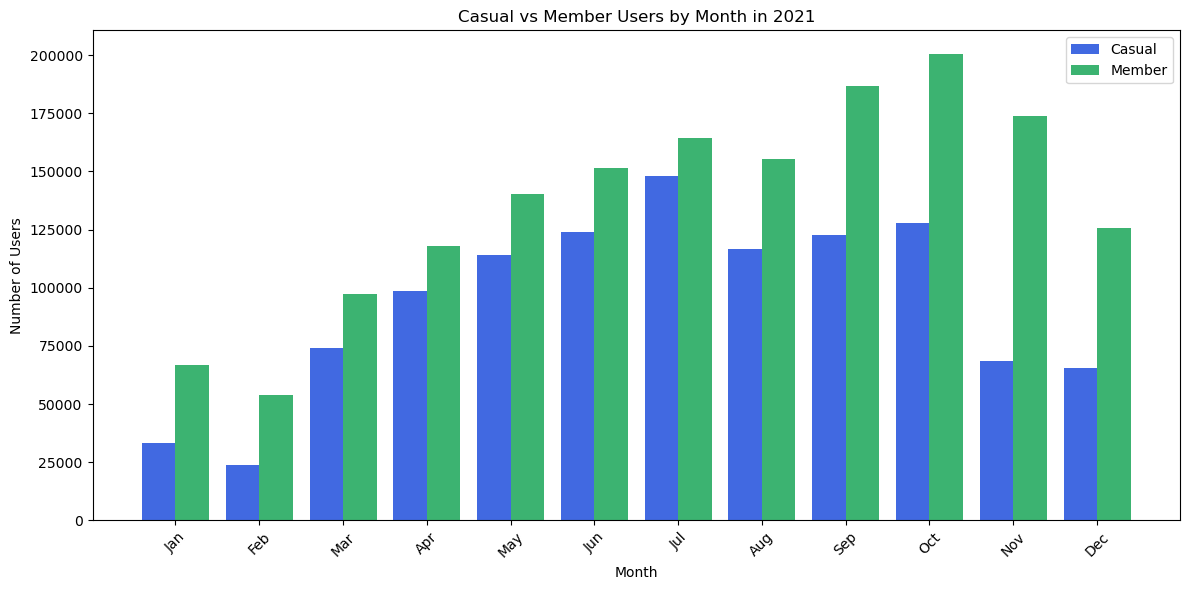

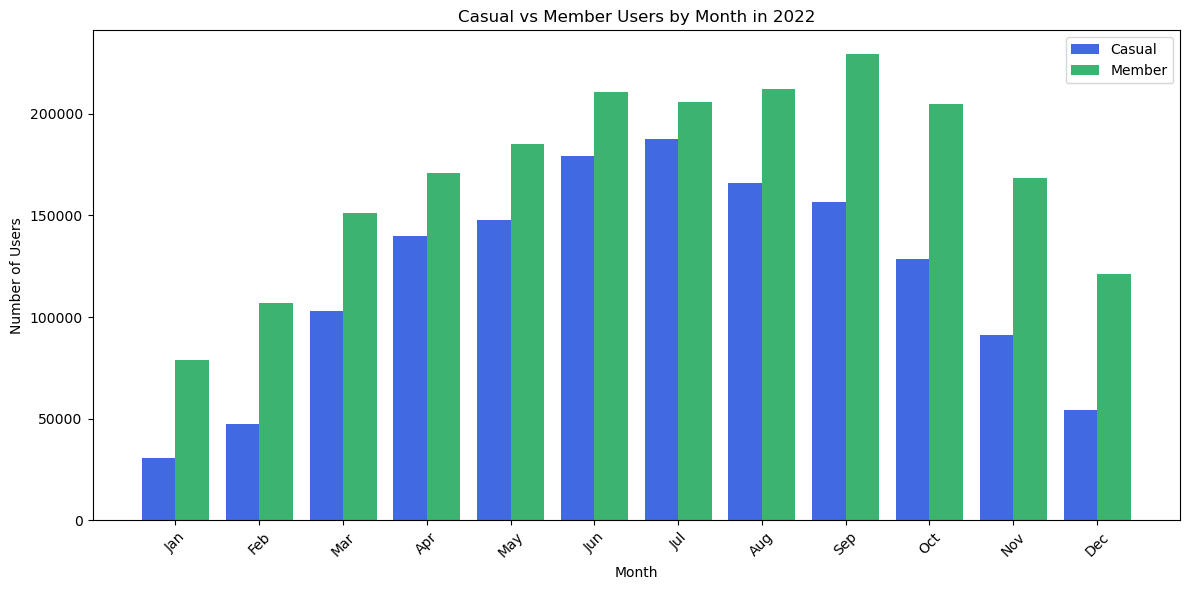

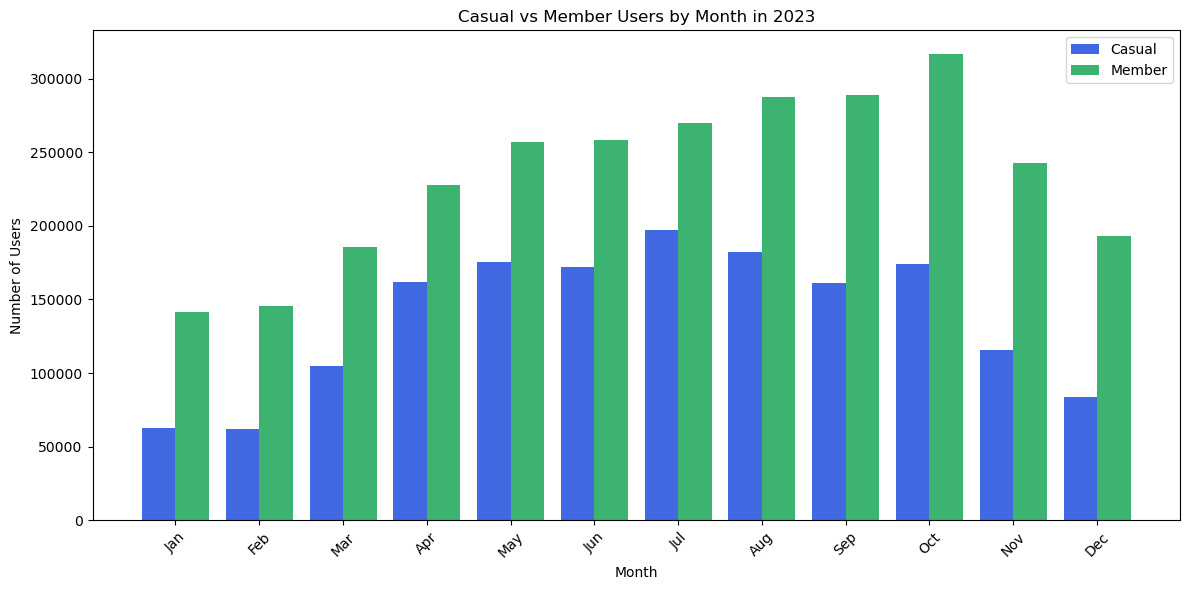

In [51]:
# To check if the data is accurate with our other data set, and it is. 

month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

df_hourly_weather['year'] = df_hourly_weather['date'].dt.year
df_hourly_weather['month'] = df_hourly_weather['date'].dt.month

casual_by_month = df_hourly_weather.groupby('month')['casual'].sum()
member_by_month = df_hourly_weather.groupby('month')['member'].sum()
months = casual_by_month.index.astype(str)


monthly_users = df_hourly_weather.groupby(['year', 'month'])[['casual', 'member']].sum().reset_index()

for year in monthly_users['year'].unique():
    yearly_data = monthly_users[monthly_users['year'] == year]
    months = yearly_data['month']
    x = np.arange(len(months))
    width = 0.4

    plt.figure(figsize=(12, 6))
    plt.bar(x - width/2, yearly_data['casual'], width=width, label='Casual', color='royalblue')
    plt.bar(x + width/2, yearly_data['member'], width=width, label='Member', color='mediumseagreen')

    plt.xticks(x, [month_names[m-1] for m in months], rotation=45)
    plt.xlabel('Month')
    plt.ylabel('Number of Users')
    plt.title(f'Casual vs Member Users by Month in {year}')
    plt.legend()
    plt.tight_layout()
    plt.show()

In [52]:
df_hourly_weather.columns

Index(['casual', 'date', 'hour', 'member', 'total_rides',
       'relativehumidity_2m_(%)', 'temperature_2m_(°c)',
       'weathercode_(wmo code)', 'windspeed_10m (km/h)', 'year', 'month'],
      dtype='object')

### NO - Avarage Ride per hour per day of week per year

/var/folders/pm/7vn7thz14p556cr_ql9w5xbw0000gn/T/ipykernel_37884/1712230003.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  weekday_hourly = df_hourly_weather.groupby(['weekday', 'hour'])['total_rides'].mean().reset_index()
/var/folders/pm/7vn7thz14p556cr_ql9w5xbw0000gn/T/ipykernel_37884/1712230003.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  busiest_hours = weekday_hourly.loc[weekday_hourly.groupby('weekday')['total_rides'].idxmax()]


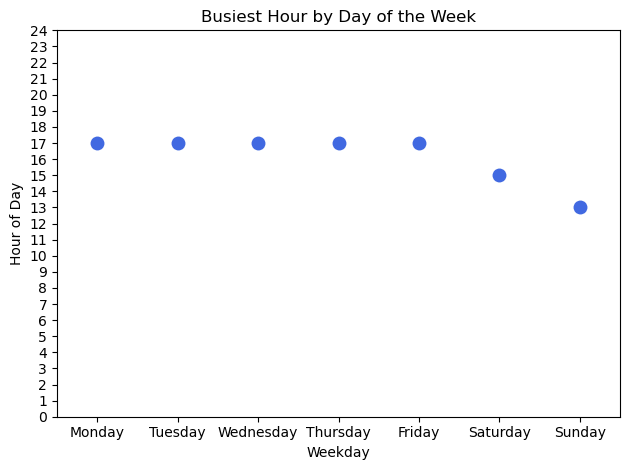

In [66]:
df_hourly_weather['year'] = df_hourly_weather['date'].dt.year
df_hourly_weather['month'] = df_hourly_weather['date'].dt.month
df_hourly_weather['weekday'] = df_hourly_weather['date'].dt.day_name()

weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df_hourly_weather['weekday'] = pd.Categorical(df_hourly_weather['weekday'], categories=weekday_order, ordered=True)
busiest_hours = df_hourly_weather.sort_values('weekday')


weekday_hourly = df_hourly_weather.groupby(['weekday', 'hour'])['total_rides'].mean().reset_index()

busiest_hours = weekday_hourly.loc[weekday_hourly.groupby('weekday')['total_rides'].idxmax()]

# plt.figure(figsize=(12, 6))
# plt.bar(busiest_hours['weekday'], busiest_hours['hour'], color='royalblue')
# plt.xlabel('Day of Week')
# plt.ylabel('Busiest Hour')
# plt.ylim(0, 24)
# plt.yticks(np.arange(0, 25, 1))
# plt.title('Busiest Hour of the Day by Weekday')
# plt.xticks(rotation=45)
# plt.tight_layout()
# plt.show()

# sns.pointplot(x='weekday', y='hour', data=busiest_hours, color='royalblue')
# plt.ylim(0, 24)
# plt.yticks(np.arange(0, 25, 1))
# plt.title('Busiest Hour by Day of the Week')
# plt.ylabel('Hour of Day')
# plt.xlabel('Weekday')
# plt.tight_layout()
# plt.show()

import seaborn as sns

sns.stripplot(x='weekday', y='hour', data=busiest_hours, size=10, color='royalblue')
plt.ylim(0, 24)
plt.yticks(np.arange(0, 25, 1))
plt.title('Busiest Hour by Day of the Week')
plt.ylabel('Hour of Day')
plt.xlabel('Weekday')
plt.tight_layout()
plt.show()




### Morning Vs Afternoon Overall

/var/folders/pm/7vn7thz14p556cr_ql9w5xbw0000gn/T/ipykernel_37884/226304944.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rush_hours['weekday'] = pd.Categorical(
/var/folders/pm/7vn7thz14p556cr_ql9w5xbw0000gn/T/ipykernel_37884/226304944.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rush_summary = df_rush_hours.groupby(['weekday', 'time_block'])['total_rides'].mean().reset_index()


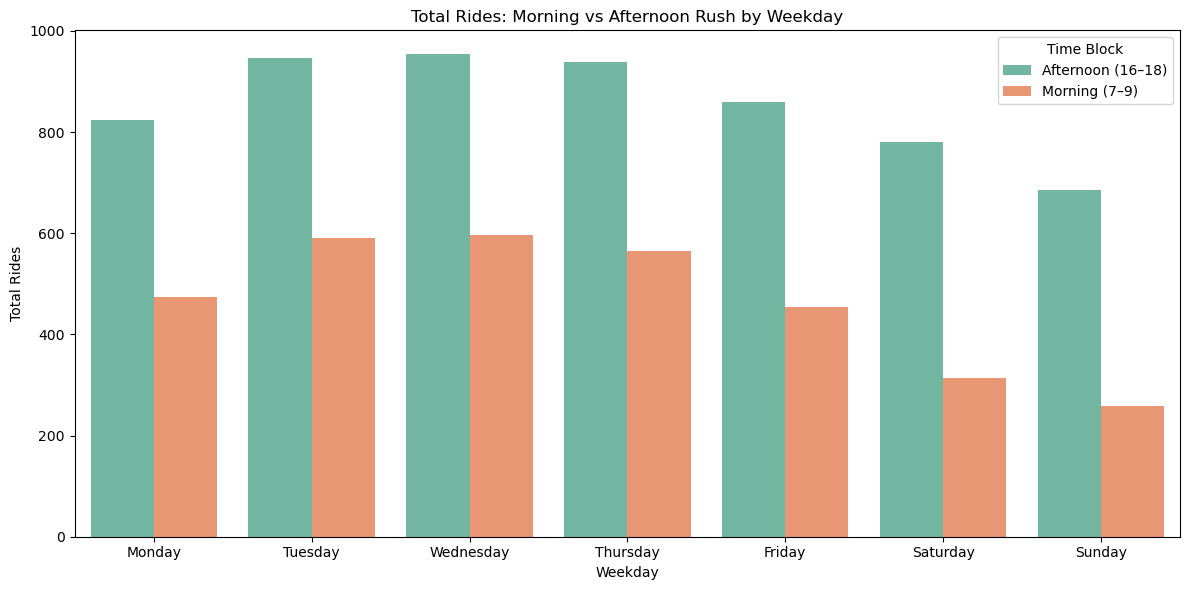

In [70]:
def get_time_block(hour):
    if 7 <= hour <= 9:
        return 'Morning (7–9)'
    elif 16 <= hour <= 18:
        return 'Afternoon (16–18)'
    else:
        return None

df_hourly_weather['time_block'] = df_hourly_weather['hour'].apply(get_time_block)
df_rush_hours = df_hourly_weather[df_hourly_weather['time_block'].notnull()]

df_rush_hours['weekday'] = pd.Categorical(
    df_rush_hours['date'].dt.day_name(),
    categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
    ordered=True
)

rush_summary = df_rush_hours.groupby(['weekday', 'time_block'])['total_rides'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(
    data=rush_summary,
    x='weekday',
    y='total_rides',
    hue='time_block',
    palette='Set2'
)
plt.title('Total Rides: Morning vs Afternoon Rush by Weekday')
plt.ylabel('Total Rides')
plt.xlabel('Weekday')
plt.legend(title='Time Block')
plt.tight_layout()
plt.show()


In [68]:
# It looks like people use the bicicles more to come back from work rather than go to work. So if we have issues with stations being empty we should focus on the places where people go to work. 

### Morning Vs Afternoon avarage rides in 2021


/var/folders/pm/7vn7thz14p556cr_ql9w5xbw0000gn/T/ipykernel_37884/215669742.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rush_hours_2021['weekday'] = pd.Categorical(
/var/folders/pm/7vn7thz14p556cr_ql9w5xbw0000gn/T/ipykernel_37884/215669742.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rush_summary_2021 = df_rush_hours_2021.groupby(['weekday', 'time_block'])['total_rides'].mean().reset_index()


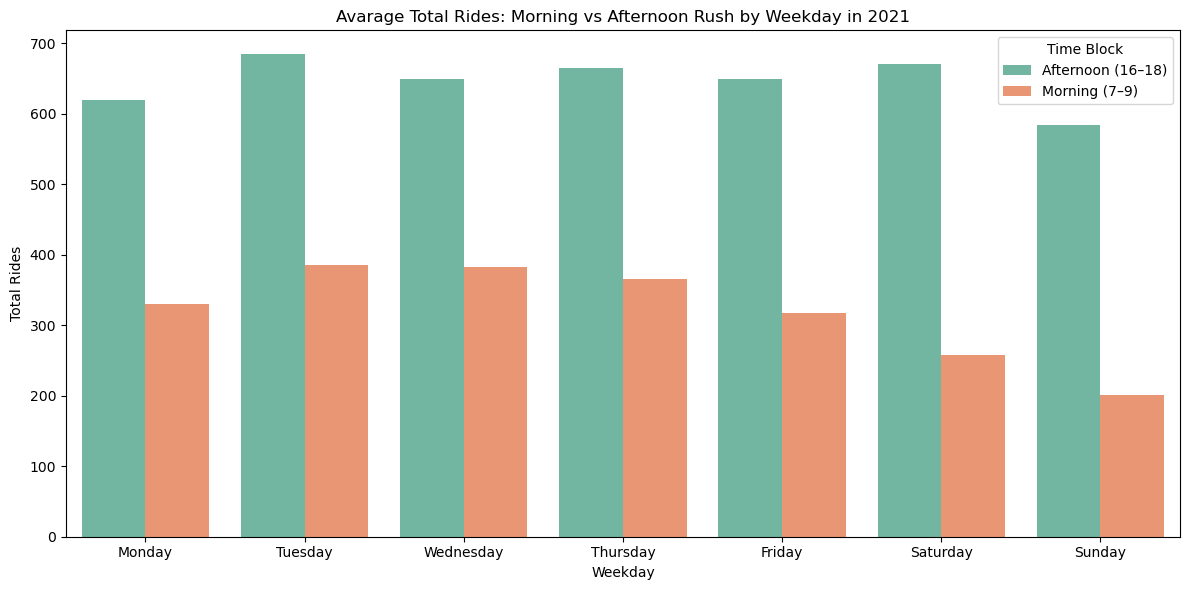

In [73]:
df_2021 = df_hourly_weather[df_hourly_weather['date'].dt.year == 2021].copy()

def get_time_block(hour):
    if 7 <= hour <= 9:
        return 'Morning (7–9)'
    elif 16 <= hour <= 18:
        return 'Afternoon (16–18)'
    else:
        return None

df_2021['time_block'] = df_2021['hour'].apply(get_time_block)
df_rush_hours_2021 = df_2021[df_2021['time_block'].notnull()]

df_rush_hours_2021['weekday'] = pd.Categorical(
    df_rush_hours_2021['date'].dt.day_name(),
    categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
    ordered=True
)

rush_summary_2021 = df_rush_hours_2021.groupby(['weekday', 'time_block'])['total_rides'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(
    data=rush_summary_2021,
    x='weekday',
    y='total_rides',
    hue='time_block',
    palette='Set2'
)
plt.title('Avarage Total Rides: Morning vs Afternoon Rush by Weekday in 2021')
plt.ylabel('Total Rides')
plt.xlabel('Weekday')
plt.legend(title='Time Block')
plt.tight_layout()
plt.show()


### Morning Vs Afternoon Avarage Rides in 2022

/var/folders/pm/7vn7thz14p556cr_ql9w5xbw0000gn/T/ipykernel_37884/4115219430.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rush_hours_2022['weekday'] = pd.Categorical(
/var/folders/pm/7vn7thz14p556cr_ql9w5xbw0000gn/T/ipykernel_37884/4115219430.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rush_summary_2022 = df_rush_hours_2022.groupby(['weekday', 'time_block'])['total_rides'].mean().reset_index()


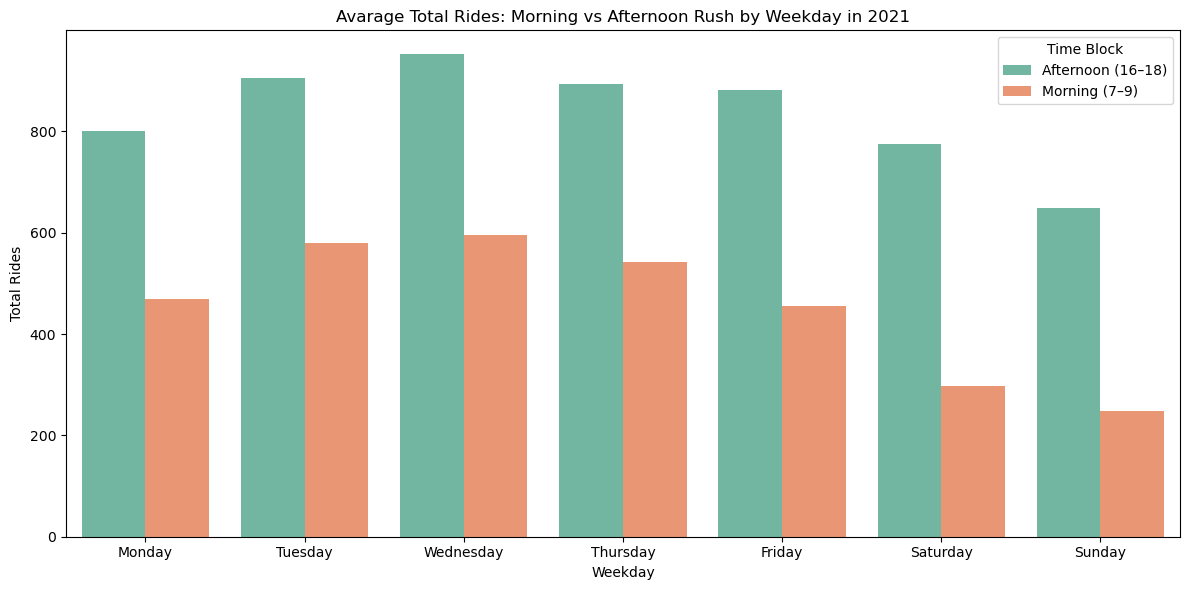

In [75]:
df_2022 = df_hourly_weather[df_hourly_weather['date'].dt.year == 2022].copy()

def get_time_block(hour):
    if 7 <= hour <= 9:
        return 'Morning (7–9)'
    elif 16 <= hour <= 18:
        return 'Afternoon (16–18)'
    else:
        return None

df_2022['time_block'] = df_2022['hour'].apply(get_time_block)
df_rush_hours_2022 = df_2022[df_2022['time_block'].notnull()]

df_rush_hours_2022['weekday'] = pd.Categorical(
    df_rush_hours_2022['date'].dt.day_name(),
    categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
    ordered=True
)

rush_summary_2022 = df_rush_hours_2022.groupby(['weekday', 'time_block'])['total_rides'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(
    data=rush_summary_2022,
    x='weekday',
    y='total_rides',
    hue='time_block',
    palette='Set2'
)
plt.title('Avarage Total Rides: Morning vs Afternoon Rush by Weekday in 2021')
plt.ylabel('Total Rides')
plt.xlabel('Weekday')
plt.legend(title='Time Block')
plt.tight_layout()
plt.show()


### Morning Vs Afternoon Avarage Rides in 2023

/var/folders/pm/7vn7thz14p556cr_ql9w5xbw0000gn/T/ipykernel_37884/2498178703.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rush_hours_2023['weekday'] = pd.Categorical(
/var/folders/pm/7vn7thz14p556cr_ql9w5xbw0000gn/T/ipykernel_37884/2498178703.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rush_summary_2023 = df_rush_hours_2023.groupby(['weekday', 'time_block'])['total_rides'].mean().reset_index()


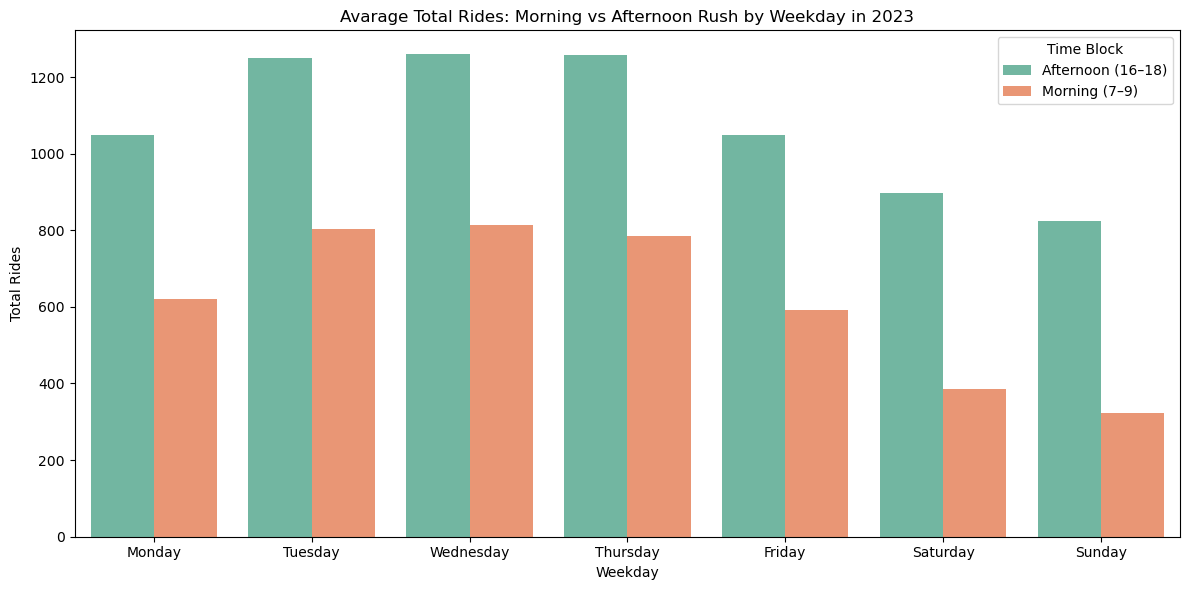

In [77]:
df_2023 = df_hourly_weather[df_hourly_weather['date'].dt.year == 2023].copy()

def get_time_block(hour):
    if 7 <= hour <= 9:
        return 'Morning (7–9)'
    elif 16 <= hour <= 18:
        return 'Afternoon (16–18)'
    else:
        return None

df_2023['time_block'] = df_2023['hour'].apply(get_time_block)
df_rush_hours_2023 = df_2023[df_2023['time_block'].notnull()]

df_rush_hours_2023['weekday'] = pd.Categorical(
    df_rush_hours_2023['date'].dt.day_name(),
    categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
    ordered=True
)

rush_summary_2023 = df_rush_hours_2023.groupby(['weekday', 'time_block'])['total_rides'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(
    data=rush_summary_2023,
    x='weekday',
    y='total_rides',
    hue='time_block',
    palette='Set2'
)
plt.title('Avarage Total Rides: Morning vs Afternoon Rush by Weekday in 2023')
plt.ylabel('Total Rides')
plt.xlabel('Weekday')
plt.legend(title='Time Block')
plt.tight_layout()
plt.show()


### (Not Available) Avarage Trip length in the afternoon

In [80]:
df_rush_hours.columns

Index(['casual', 'date', 'hour', 'member', 'total_rides',
       'relativehumidity_2m_(%)', 'temperature_2m_(°c)',
       'weathercode_(wmo code)', 'windspeed_10m (km/h)', 'year', 'month',
       'day', 'weekday', 'time_block'],
      dtype='object')

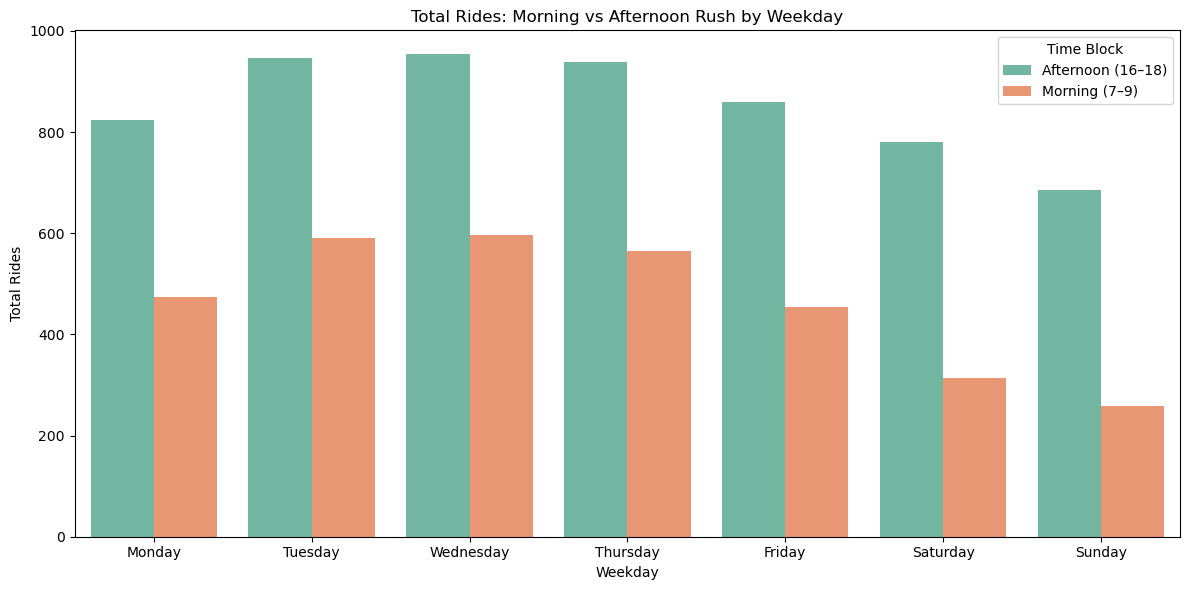

In [ ]:
# # df_rush_hours['weekday'] = pd.Categorical(
# #     df_rush_hours['date'].dt.day_name(),
# #     categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
# #     ordered=True
# # )

# afternoon_rush = df_rush_hours[df_rush_hours['time_block'] == 'Afternoon (16–18)']
# afternoon_rush = df_rush_hours.groupby('time_block')['total_rides'].mean().reset_index()

# plt.figure(figsize=(12, 6))
# sns.barplot(
#     data=rush_summary,
#     x='weekday',
#     y='total_rides',
#     hue='time_block',
#     palette='Set2'
# )
# plt.title('Avarage trip length in the afternoon')
# plt.ylabel('Total Rides')
# plt.xlabel('Weekday')
# plt.legend(title='Time Block')
# plt.tight_layout()
# plt.show()


### Check LMS

### Interactive chart that shows location per time of the day. 

### What interactive charts can I use, 